# What are embedding
Think of embeddings as a way to translate words into languate that computer understand - numbers

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Simple Embedding Example
word_embeddings = {
    "cat": [0.8, 0.6],
    "dog": [0.7, 0.65],
    "bird": [0.9,0.95],
    "truck": [-0.2, -0.27]
}    

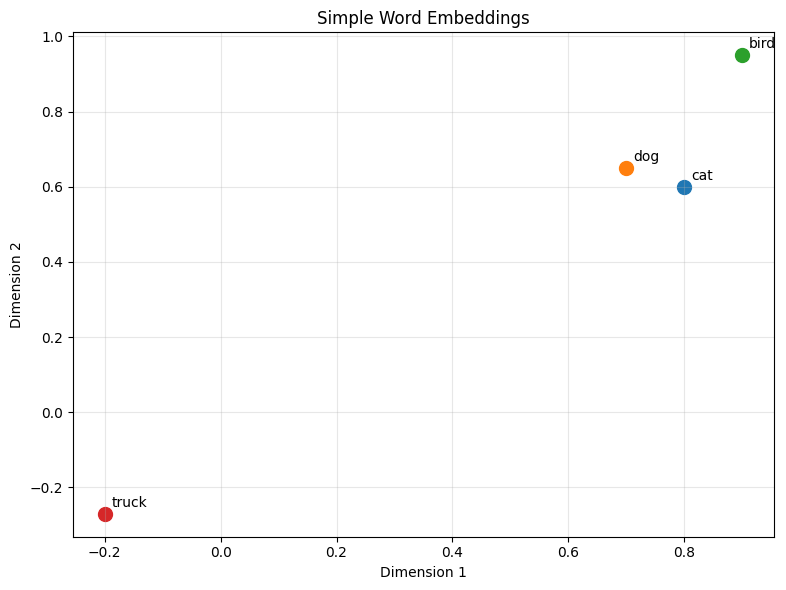

In [5]:
fix, ax = plt.subplots(figsize=(8,6))

for word, coords in word_embeddings.items():
    ax.scatter(coords[0], coords[1], s=100)
    ax.annotate(word, (coords[0], coords[1]),xytext=(5,5), textcoords='offset points')
    
ax.set_title("Simple Word Embeddings")
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Measuring similarity

In [10]:
def cosine_similarity(vec1, vec2):
    """
    Cosine similiarity measures the angle between two vectors
    - Result close to 1: Very similar
    - Result close to 0: Not related
    - Result close to -1: opposite meanings
    """
    
    dot_product = np.dot(vec1, vec2)
    norm_a = np.linalg.norm(vec1)
    norm_b = np.linalg.norm(vec2)
    
    return dot_product / (norm_a * norm_b)

In [13]:
# Example
cat=[0.8, 0.6]
dog=[0.7, 0.65]
bird=[0.9,0.95]

cat_dog_similarity = cosine_similarity(cat, dog)
print(f"Similar: {cat_dog_similarity}")

Similar: 0.9945054529214059
